# Smash Bros Ultimate Online Analysis
This notebook analyzes the data for all matches played on smash.gg where their characters or stage were recorded

In [1]:
import numpy as np
import pandas as pd
import plotnine
from plotnine import *

In [2]:
games_df = pd.read_csv('old_data_corrected.csv', index_col=0)
games_df.head()

/home/heil/anaconda3/envs/smash/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


,char1,char2,stage,winner,entrant1,entrant2
0,Lucina,Ness,Pokémon Stadium 2,Ness,KG | Jegerlilla,RES | Venom
1,Ness,Lucina,Smashville,Ness,RES | Venom,KG | Jegerlilla
2,Ness,Lucina,Battlefield,Ness,RES | Venom,KG | Jegerlilla
3,Banjo-Kazooie,Young Link,Final Destination,Banjo-Kazooie,RoA | Irish_Penguin,LazZzy
4,Banjo-Kazooie,Young Link,Final Destination,Banjo-Kazooie,RoA | Irish_Penguin,LazZzy


## Most Popular Character/Stage
To better understand the data, the first step is to count the frequencies of each character and stage

In [3]:
games_df['stage'].value_counts()

Pokémon Stadium 2       363806
Final Destination       167350
Town and City           166094
Smashville              160557
Battlefield             152984
Kalos Pokémon League     89603
Yoshi's Story            38674
Lylat Cruise             23680
Yoshi's Island           12172
Pokémon Stadium           5006
Unova Pokémon League      3001
Castle Siege              1566
WarioWare, Inc.            248
Frigate Orpheon             75
Skyloft                     55
Magicant                    23
Mario Circuit               12
Name: stage, dtype: int64

### Stage Results:
Unsurprisingly, the top five stages are the five starting stages in modern rulesets. Other well-represented stages are stages [that were legal in the past.](https://smash.gg/tournament/ultimate-naifu-wars-1/details)

In [4]:
char_totals = games_df['char1'].value_counts() + games_df['char2'].value_counts()
sorted_totals = char_totals.sort_values(ascending=False)
for count, char in zip(sorted_totals, sorted_totals.index):
    print('{}\t\t\t{}'.format(char, count))

Joker			80679
Wolf			75062
Cloud			74361
Bowser			73659
Ness			73567
Pokemon Trainer			72421
Palutena			72241
Inkling			67898
Snake			66656
Yoshi			60523
R.O.B.			57141
Mario			50821
Lucina			50433
Donkey Kong			46839
Link			46396
Luigi			44991
Pikachu			44347
Sonic			43210
Zelda			42364
Ganondorf			41747
Roy			37686
Mr. Game and Watch			36726
Young Link			35589
King Dedede			35453
Ike			35178
Jigglypuff			34940
Pac-Man			34764
Banjo-Kazooie			33995
Captain Falcon			33509
Greninja			33415
Samus			32651
Lucas			32608
King K. Rool			31961
Zero Suit Samus			31255
Terry			30330
Hero			29826
Little Mac			29317
Wii Fit Trainer			28179
Chrom			26652
Kirby			24589
Fox			24096
Toon Link			23389
Piranha Plant			23315
Shulk			23206
Ridley			23067
Pichu			22909
Peach			21908
Bowser Jr.			21689
Mega Man			20919
Robin			20804
Ken			20588
Richter			18281
Bayonetta			18190
Wario			17755
Incineroar			17017
Falco			16960
Byleth			16912
Isabelle			16379
Dr. Mario			16259
Villager			15452
Diddy Kong			154

### Character Results


In [5]:
char_to_index = {}

i = 0
for char in games_df['char1']:
    if char not in char_to_index:
        char_to_index[char] = i
        i += 1
print(len(char_to_index))

82


In [6]:
# format = winner: loser: count
wins_map = {}

for _, row in games_df.iterrows():
    char1 = row['char1']
    char2 = row['char2']
    
    char1_is_winner = row['char1'] == row['winner']
    
    if not char1_is_winner:
        char1, char2 = (char2, char1)
        
    if char1 not in wins_map:
        wins_map[char1] = {}
        wins_map[char1][char2] = 1
    elif char2 not in wins_map[char1]:
        wins_map[char1][char2] = 1
    else:
        wins_map[char1][char2] += 1

In [7]:
matchup_info = {'char1': [], 
                'char2': [],
                'win_rate': [],
                'games_played': []
               }
char_to_win_rate = {}
for char1 in wins_map:
    char_win_rates = []
    for char2 in wins_map[char1]:
        matchup_info['char1'].append(char1)
        matchup_info['char2'].append(char2)
        
        games_played = wins_map[char1][char2]
        try:
            games_played += wins_map[char2][char1]
        except KeyError:
            pass
        
        win_rate = wins_map[char1][char2] / games_played
        char_win_rates.append(win_rate)
        
        matchup_info['win_rate'].append(win_rate)
        matchup_info['games_played'].append(games_played)
    char_to_win_rate[char1] = sum(char_win_rates) / len(char_win_rates)
    
for key in matchup_info:
    print(key, len(matchup_info[key]))
matchup_df = pd.DataFrame.from_dict(matchup_info)
matchup_df

char1 6646
char2 6646
win_rate 6646
games_played 6646


,char1,char2,win_rate,games_played
0,Ness,Lucina,0.567711,1883
1,Ness,Piranha Plant,0.534483,638
2,Ness,Mario,0.537493,1667
3,Ness,Shulk,0.465185,675
4,Ness,Pokemon Trainer,0.546072,2062
...,...,...,...,...
6641,NaN,Bowser,0.003185,314
6642,NaN,Chrom,0.006289,159
6643,NaN,Pac-Man,0.009259,108
6644,NaN,Dark Pit,0.021739,46


In [8]:
matchup_df['char1_overall_win_rate'] = matchup_df['char1'].apply(lambda x: char_to_win_rate.get(x))
matchup_df['char2_overall_win_rate'] = matchup_df['char2'].apply(lambda x: char_to_win_rate.get(x))
matchup_df = matchup_df.sort_values(['char1_overall_win_rate', 'char2_overall_win_rate'], ascending=True)
matchup_df = matchup_df.dropna()
matchup_df

,char1,char2,win_rate,games_played,char1_overall_win_rate,char2_overall_win_rate
6516,Marth,Marth,0.500000,180,0.389787,0.389787
6503,Marth,Lucina,0.412256,359,0.389787,0.410306
6484,Marth,Corrin,0.525000,80,0.389787,0.415730
6486,Marth,Random,0.400000,5,0.389787,0.418969
6515,Marth,Falco,0.430000,100,0.389787,0.422085
...,...,...,...,...,...,...
2448,Richter,Wii Fit Trainer,0.500000,194,0.600338,0.572978
2433,Richter,Simon Belmont,0.576389,144,0.600338,0.578566
2378,Richter,R.O.B.,0.511873,379,0.600338,0.579937
2436,Richter,Snake,0.496491,570,0.600338,0.590394


In [9]:
# Force char1 and char2 to be categorical to keep plotnine from resorting them
sorted_chars = matchup_df['char1'].unique().tolist()
char1_cat = pd.Categorical(matchup_df['char1'], categories=sorted_chars)
matchup_df['char1_cat'] = char1_cat
char2_cat = pd.Categorical(matchup_df['char2'], categories=sorted_chars)
matchup_df['char2_cat'] = char2_cat
matchup_df

,char1,char2,win_rate,games_played,char1_overall_win_rate,char2_overall_win_rate,char1_cat,char2_cat
6516,Marth,Marth,0.500000,180,0.389787,0.389787,Marth,Marth
6503,Marth,Lucina,0.412256,359,0.389787,0.410306,Marth,Lucina
6484,Marth,Corrin,0.525000,80,0.389787,0.415730,Marth,Corrin
6486,Marth,Random,0.400000,5,0.389787,0.418969,Marth,Random
6515,Marth,Falco,0.430000,100,0.389787,0.422085,Marth,Falco
...,...,...,...,...,...,...,...,...
2448,Richter,Wii Fit Trainer,0.500000,194,0.600338,0.572978,Richter,Wii Fit Trainer
2433,Richter,Simon Belmont,0.576389,144,0.600338,0.578566,Richter,Simon Belmont
2378,Richter,R.O.B.,0.511873,379,0.600338,0.579937,Richter,R.O.B.
2436,Richter,Snake,0.496491,570,0.600338,0.590394,Richter,Snake


In [10]:
matchup_df.to_csv('matchups.csv')

## Matchup Analysis

In [11]:
clean_matchup_df = matchup_df[matchup_df['char1'] != 'Random']
clean_matchup_df = clean_matchup_df[clean_matchup_df['char2'] != 'Random']
clean_matchup_df = clean_matchup_df[clean_matchup_df['games_played'] > 10]

clean_matchup_df

,char1,char2,win_rate,games_played,char1_overall_win_rate,char2_overall_win_rate,char1_cat,char2_cat
6516,Marth,Marth,0.500000,180,0.389787,0.389787,Marth,Marth
6503,Marth,Lucina,0.412256,359,0.389787,0.410306,Marth,Lucina
6484,Marth,Corrin,0.525000,80,0.389787,0.415730,Marth,Corrin
6515,Marth,Falco,0.430000,100,0.389787,0.422085,Marth,Falco
6480,Marth,Sheik,0.500000,36,0.389787,0.424398,Marth,Sheik
...,...,...,...,...,...,...,...,...
2448,Richter,Wii Fit Trainer,0.500000,194,0.600338,0.572978,Richter,Wii Fit Trainer
2433,Richter,Simon Belmont,0.576389,144,0.600338,0.578566,Richter,Simon Belmont
2378,Richter,R.O.B.,0.511873,379,0.600338,0.579937,Richter,R.O.B.
2436,Richter,Snake,0.496491,570,0.600338,0.590394,Richter,Snake


In [12]:
clean_matchup_df[clean_matchup_df['games_played'] > 50].sort_values('win_rate', ascending=False).head(10)

,char1,char2,win_rate,games_played,char1_overall_win_rate,char2_overall_win_rate,char1_cat,char2_cat
2408,Richter,Corrin,0.833333,54,0.600338,0.415730,Richter,Corrin
4952,Bowser Jr.,Pit,0.805556,72,0.558792,0.472033,Bowser Jr.,Pit
5476,Mega Man,Corrin,0.802326,86,0.563514,0.415730,Mega Man,Corrin
5975,Ice Climbers,Falco,0.769231,78,0.531210,0.422085,Ice Climbers,Falco
5624,Terry,Olimar,0.757576,66,0.544695,0.489682,Terry,Olimar
2456,Richter,Olimar,0.753623,69,0.600338,0.489682,Richter,Olimar
5801,Dr. Mario,Dark Pit,0.750000,68,0.543711,0.441220,Dr. Mario,Dark Pit
5475,Mega Man,Falco,0.748201,139,0.563514,0.422085,Mega Man,Falco
2931,Bayonetta,Sheik,0.739130,69,0.541669,0.424398,Bayonetta,Sheik
5395,Duck Hunt,Byleth,0.737500,80,0.541788,0.442975,Duck Hunt,Byleth


In [13]:
clean_matchup_df[clean_matchup_df['games_played'] > 1000].sort_values('win_rate', ascending=False).head(10)

,char1,char2,win_rate,games_played,char1_overall_win_rate,char2_overall_win_rate,char1_cat,char2_cat
454,Snake,Lucina,0.664987,1191,0.590394,0.410306,Snake,Lucina
427,Snake,Joker,0.663953,2580,0.590394,0.434267,Snake,Joker
1754,R.O.B.,Joker,0.660920,1740,0.579937,0.434267,R.O.B.,Joker
1645,Pac-Man,Joker,0.645756,1084,0.552000,0.434267,Pac-Man,Joker
1746,R.O.B.,Wolf,0.638079,1749,0.579937,0.489372,R.O.B.,Wolf
1437,Inkling,Lucina,0.636480,1568,0.515308,0.410306,Inkling,Lucina
1909,King Dedede,Joker,0.636049,1154,0.544562,0.434267,King Dedede,Joker
1722,R.O.B.,Inkling,0.633987,1530,0.579937,0.515308,R.O.B.,Inkling
1403,Inkling,Joker,0.632242,1985,0.515308,0.434267,Inkling,Joker
4206,Luigi,Joker,0.630605,1405,0.554244,0.434267,Luigi,Joker


/home/heil/anaconda3/envs/smash/lib/python3.6/site-packages/plotnine/scales/scale.py:91: PlotnineWarning: scale_fill_gradient2 could not recognise parameter `med`


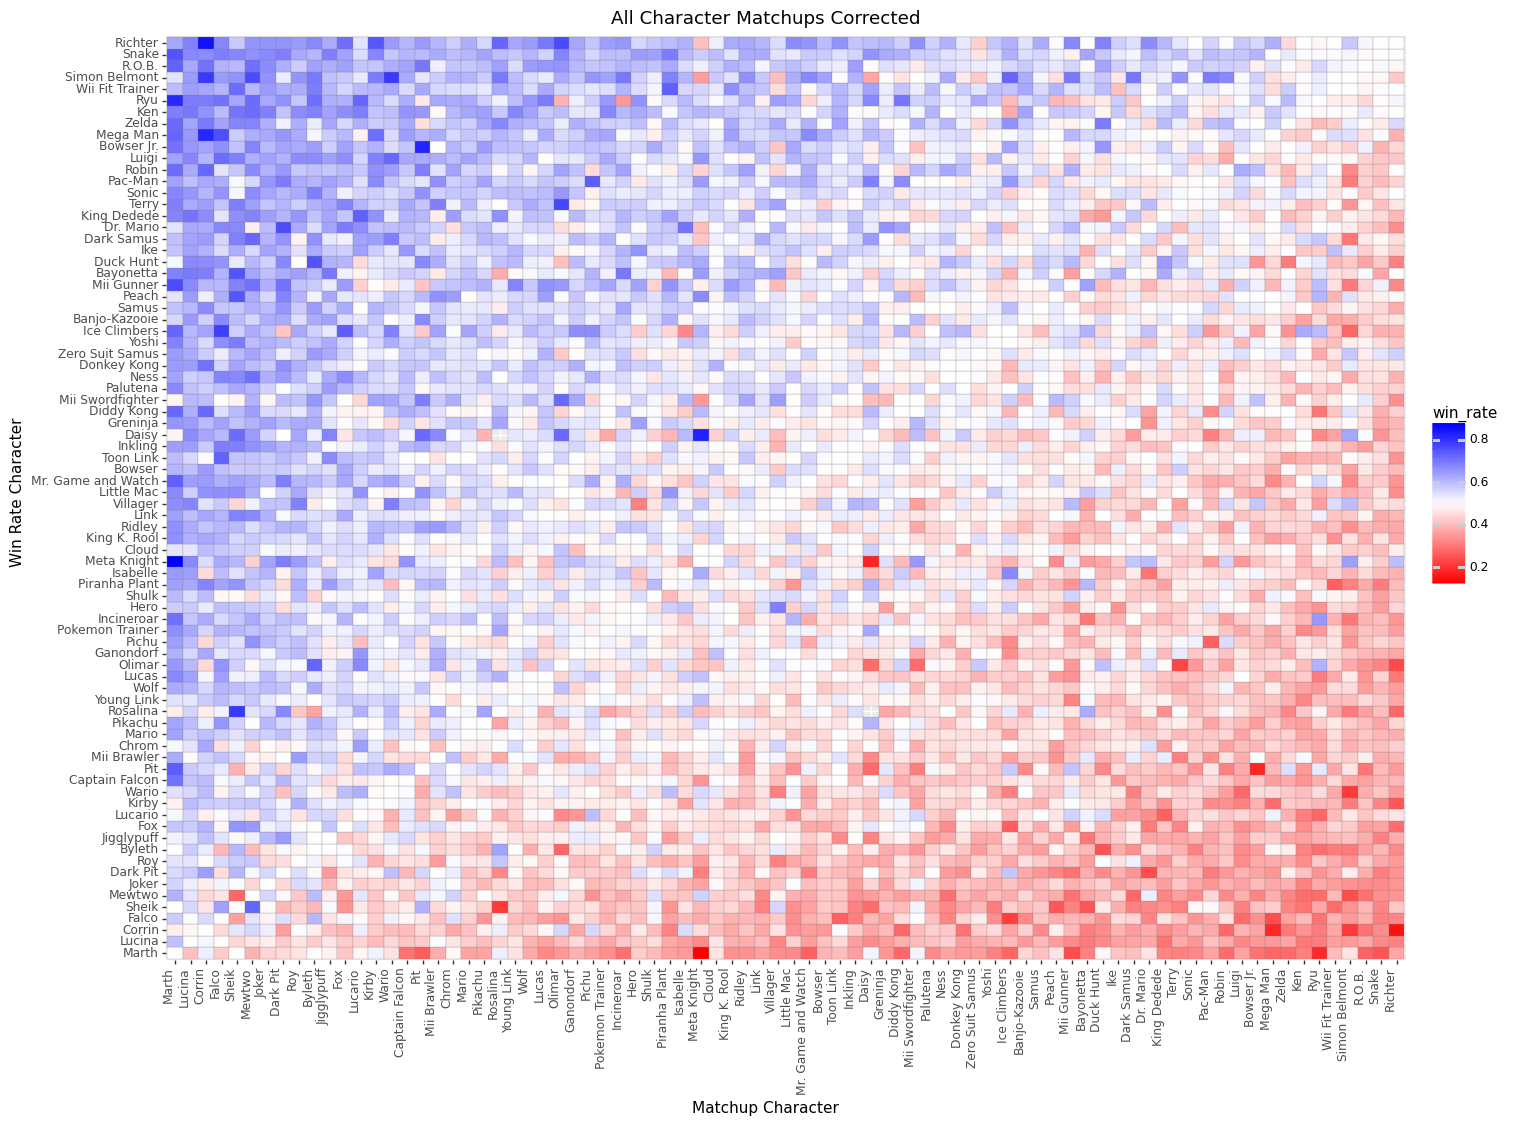

<ggplot: (-9223363248436772215)>

In [14]:
plotnine.options.figure_size = (16, 12)
plot = ggplot(clean_matchup_df, aes(x='char2_cat', y='char1_cat', fill='win_rate')) 
plot += geom_tile(color='grey')
plot = plot + theme(axis_text_x=element_text(rotation=90, hjust=1))
plot += xlab('Matchup Character')
plot += ylab('Win Rate Character')
plot += ggtitle('All Character Matchups Corrected')
plot += scale_fill_gradient2(
  low = "#ff0000",
  med = "#ffffff",
  high = "#0000ff",
  midpoint = .5
)
plot

In [15]:
clean_matchup_df = matchup_df[matchup_df['char1'] != 'Random']
clean_matchup_df = clean_matchup_df[clean_matchup_df['char2'] != 'Random']
clean_matchup_df = clean_matchup_df[clean_matchup_df['games_played'] > 50]

clean_matchup_df

,char1,char2,win_rate,games_played,char1_overall_win_rate,char2_overall_win_rate,char1_cat,char2_cat
6516,Marth,Marth,0.500000,180,0.389787,0.389787,Marth,Marth
6503,Marth,Lucina,0.412256,359,0.389787,0.410306,Marth,Lucina
6484,Marth,Corrin,0.525000,80,0.389787,0.415730,Marth,Corrin
6515,Marth,Falco,0.430000,100,0.389787,0.422085,Marth,Falco
6551,Marth,Mewtwo,0.393939,66,0.389787,0.426104,Marth,Mewtwo
...,...,...,...,...,...,...,...,...
2448,Richter,Wii Fit Trainer,0.500000,194,0.600338,0.572978,Richter,Wii Fit Trainer
2433,Richter,Simon Belmont,0.576389,144,0.600338,0.578566,Richter,Simon Belmont
2378,Richter,R.O.B.,0.511873,379,0.600338,0.579937,Richter,R.O.B.
2436,Richter,Snake,0.496491,570,0.600338,0.590394,Richter,Snake


/home/heil/anaconda3/envs/smash/lib/python3.6/site-packages/plotnine/scales/scale.py:91: PlotnineWarning: scale_fill_gradient2 could not recognise parameter `med`


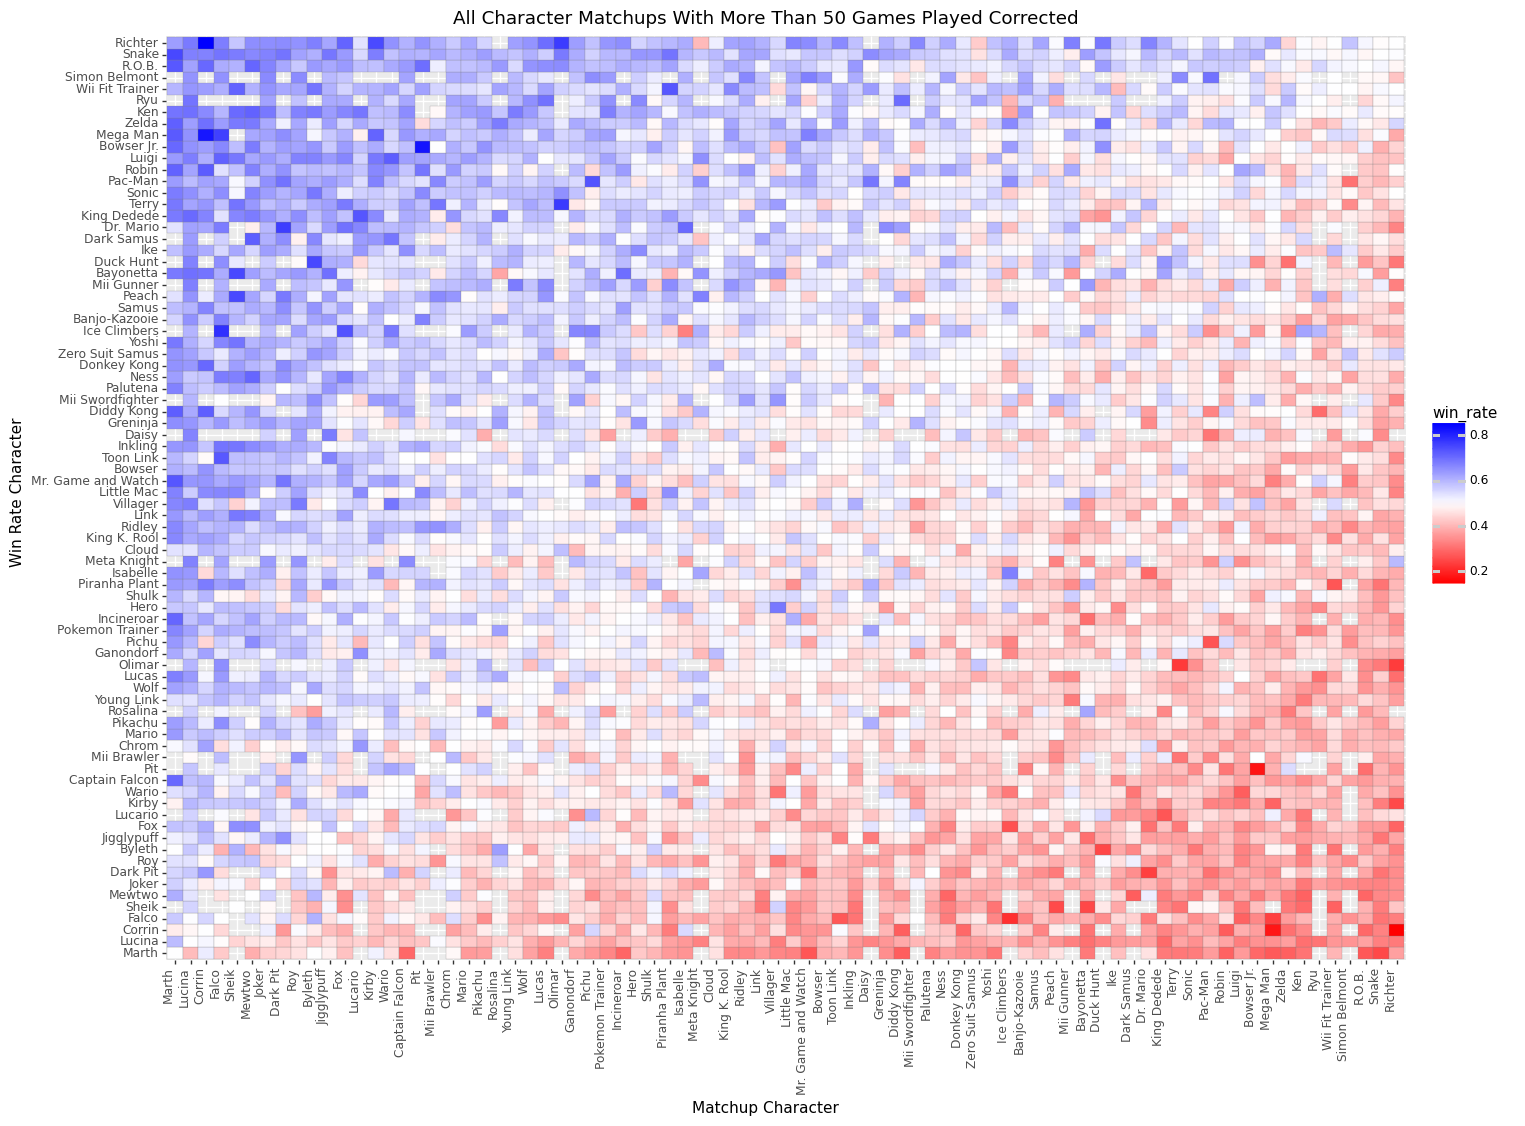

<ggplot: (8788417757111)>

In [16]:
plotnine.options.figure_size = (16, 12)
plot = ggplot(clean_matchup_df, aes(x='char2_cat', y='char1_cat', fill='win_rate')) 
plot += geom_tile(color='grey')
plot = plot + theme(axis_text_x=element_text(rotation=90, hjust=1))
plot += xlab('Matchup Character')
plot += ylab('Win Rate Character')
plot += ggtitle('All Character Matchups With More Than 50 Games Played Corrected')
plot += scale_fill_gradient2(
  low = "#ff0000",
  med = "#ffffff",
  high = "#0000ff",
  midpoint = .5
)
plot

In [17]:
matchup_df[matchup_df['char1'] == 'Bowser'].sort_values('win_rate')

,char1,char2,win_rate,games_played,char1_overall_win_rate,char2_overall_win_rate,char1_cat,char2_cat
1985,Bowser,Simon Belmont,0.371257,167,0.514572,0.578566,Bowser,Simon Belmont
2011,Bowser,Mega Man,0.387755,588,0.514572,0.563514,Bowser,Mega Man
2038,Bowser,Duck Hunt,0.404255,329,0.514572,0.541788,Bowser,Duck Hunt
1987,Bowser,Richter,0.406190,517,0.514572,0.600338,Bowser,Richter
2022,Bowser,King Dedede,0.419178,1095,0.514572,0.544562,Bowser,King Dedede
...,...,...,...,...,...,...,...,...
2033,Bowser,Falco,0.588889,630,0.514572,0.422085,Bowser,Falco
2048,Bowser,Marth,0.603333,300,0.514572,0.389787,Bowser,Marth
2049,Bowser,Random,0.611111,36,0.514572,0.418969,Bowser,Random
1995,Bowser,Fox,0.622705,599,0.514572,0.461326,Bowser,Fox


## Stage Analysis

In [18]:
stages_df = games_df.dropna()

In [19]:
stages_df.head()

,char1,char2,stage,winner,entrant1,entrant2
0,Lucina,Ness,Pokémon Stadium 2,Ness,KG | Jegerlilla,RES | Venom
1,Ness,Lucina,Smashville,Ness,RES | Venom,KG | Jegerlilla
2,Ness,Lucina,Battlefield,Ness,RES | Venom,KG | Jegerlilla
3,Banjo-Kazooie,Young Link,Final Destination,Banjo-Kazooie,RoA | Irish_Penguin,LazZzy
4,Banjo-Kazooie,Young Link,Final Destination,Banjo-Kazooie,RoA | Irish_Penguin,LazZzy


In [20]:
legal_stages = set(['Pokémon Stadium 2', 'Smashville', 'Battlefield', 'Final Destination',
                    'Kalos Pokémon League', 'Lylat Cruise', 'Town and City',
                    "Yoshi's Story"
                   ])

stage_wins = {}
stage_losses = {}

for _, row in stages_df.iterrows():
    char1 = row['char1']
    char2 = row['char2']
    winner = row['winner']
    stage = row['stage']
    
    if stage not in legal_stages:
        continue
    
    if char1 == char2: 
        continue
        
    if char1 != winner:
        char1, char2 = (char2, char1)
    
    if stage in stage_wins:
        if char1 in stage_wins[stage]:
            stage_wins[stage][char1] += 1
        else:
            stage_wins[stage][char1] = 1
    else:
        stage_wins[stage] = {}
        stage_wins[stage][char1] = 1
            
    if stage in stage_losses:
        if char2 in stage_losses[stage]:
            stage_losses[stage][char2] += 1
        else:
            stage_losses[stage][char2] = 1
    else:
        stage_losses[stage] = {}
        stage_losses[stage][char2] = 1

In [21]:
winrate_info = {'char': [], 'stage': [], 'character_winrate': [],
                    'stage_winrate': [], 'games_played': []}

for stage in stage_wins:
    for char in stage_wins[stage]:
        if stage not in stage_losses or char not in stage_losses[stage]:
            continue
        wins = stage_wins[stage][char]
        losses = stage_losses[stage][char]
        win_rate = wins / (wins + losses)
        
        winrate_info['char'].append(char)
        winrate_info['stage'].append(stage)
        winrate_info['stage_winrate'].append(win_rate)
        winrate_info['games_played'].append(wins + losses)
        winrate_info['character_winrate'].append(char_to_win_rate[char])

In [22]:
winrate_df = pd.DataFrame.from_dict(winrate_info)

In [23]:
winrate_df['stage_benefit'] = winrate_df['stage_winrate'] - winrate_df['character_winrate'] 
winrate_df

,char,stage,character_winrate,stage_winrate,games_played,stage_benefit
0,Ness,Pokémon Stadium 2,0.527345,0.512362,21032,-0.014983
1,Wolf,Pokémon Stadium 2,0.489372,0.474139,23936,-0.015232
2,Snake,Pokémon Stadium 2,0.590394,0.589541,21035,-0.000853
3,Mario,Pokémon Stadium 2,0.480831,0.483434,16449,0.002603
4,Kirby,Pokémon Stadium 2,0.462488,0.442918,6841,-0.019571
...,...,...,...,...,...,...
643,Daisy,Yoshi's Story,0.517655,0.481203,133,-0.036452
644,Pit,Yoshi's Story,0.472033,0.493023,215,0.020990
645,Simon Belmont,Yoshi's Story,0.578566,0.600000,115,0.021434
646,Marth,Yoshi's Story,0.389787,0.375394,317,-0.014393


/home/heil/anaconda3/envs/smash/lib/python3.6/site-packages/plotnine/scales/scale.py:91: PlotnineWarning: scale_fill_gradient2 could not recognise parameter `med`


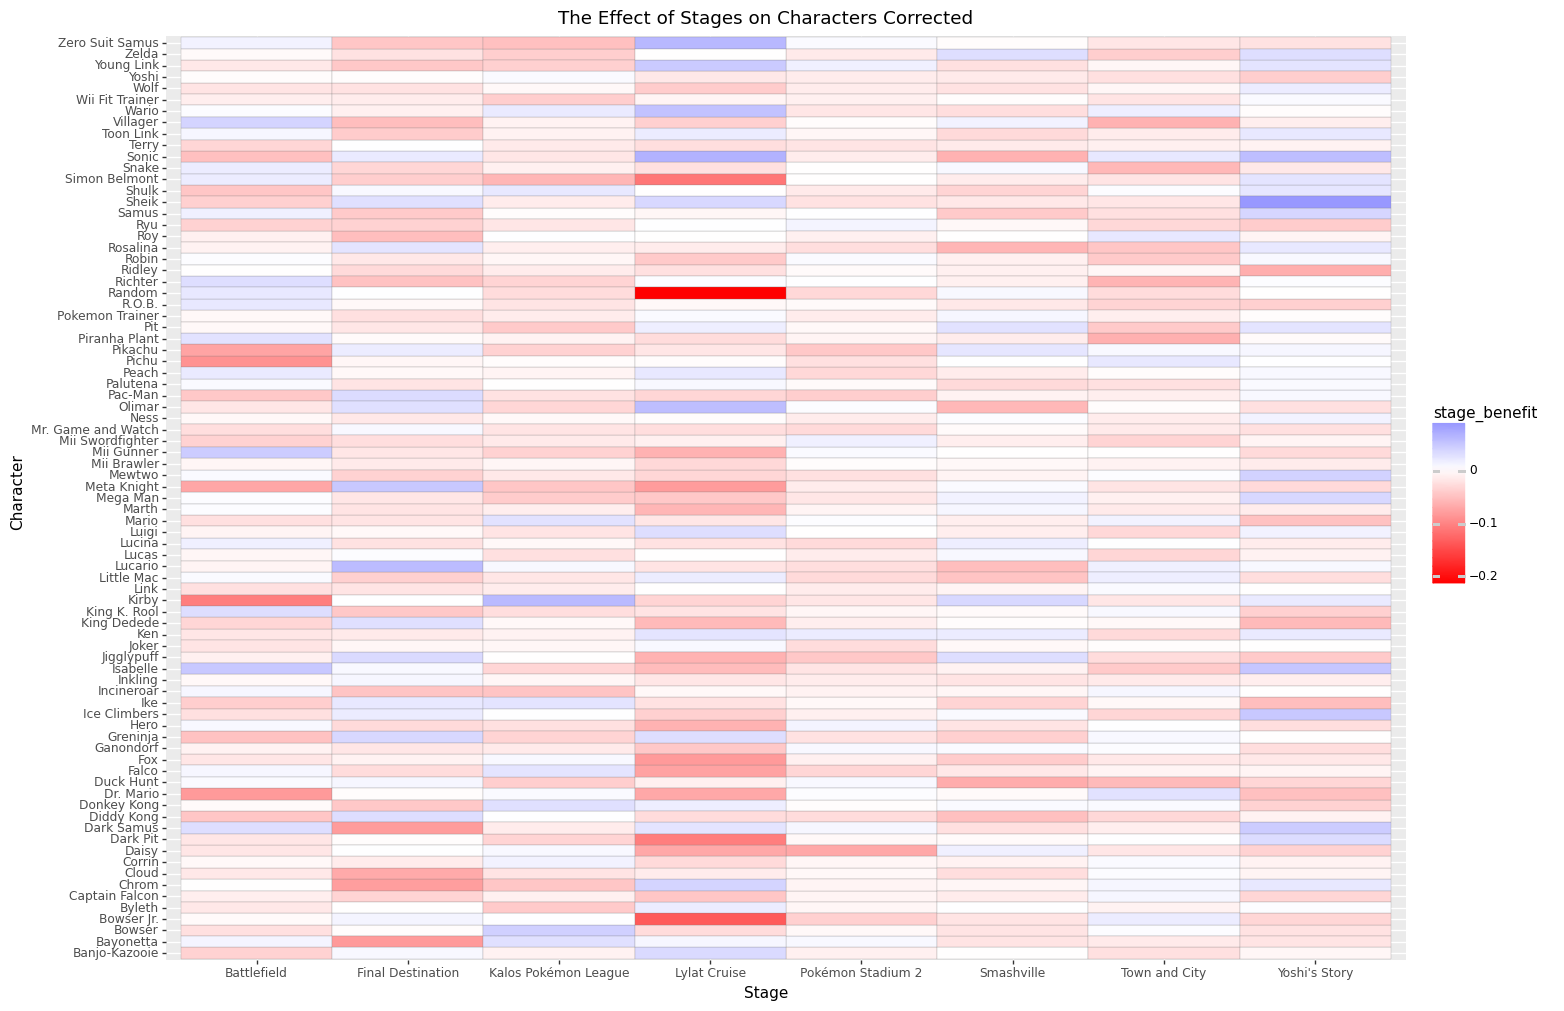

<ggplot: (8788418008794)>

In [24]:
plot =ggplot(winrate_df, aes(x='stage', y='char', fill='stage_benefit')) + geom_tile(color='grey') 
plot += xlab('Stage')
plot += ylab('Character')
plot += ggtitle('The Effect of Stages on Characters Corrected')
plot += scale_fill_gradient2(
  low = "#ff0000",
  med = "#ffffff",
  high = "#0000ff",
)
plot

In [25]:
winrate_df[winrate_df['char'] == 'Bowser']

,char,stage,character_winrate,stage_winrate,games_played,stage_benefit
17,Bowser,Pokémon Stadium 2,0.514572,0.508683,20500,-0.005889
110,Bowser,Smashville,0.514572,0.492196,8777,-0.022376
194,Bowser,Battlefield,0.514572,0.489490,8944,-0.025081
270,Bowser,Final Destination,0.514572,0.512913,8906,-0.001659
333,Bowser,Kalos Pokémon League,0.514572,0.551671,5893,0.037100
410,Bowser,Lylat Cruise,0.514572,0.487338,1619,-0.027234
507,Bowser,Town and City,0.514572,0.517295,10205,0.002724
599,Bowser,Yoshi's Story,0.514572,0.490967,3155,-0.023605


In [26]:
winrate_df.sort_values('stage_benefit')

,char,stage,character_winrate,stage_winrate,games_played,stage_benefit
485,Random,Lylat Cruise,0.418969,0.214286,14,-0.204683
431,Bowser Jr.,Lylat Cruise,0.558792,0.426136,176,-0.132656
430,Simon Belmont,Lylat Cruise,0.578566,0.469231,130,-0.109335
210,Kirby,Battlefield,0.462488,0.359223,1339,-0.103265
482,Dark Pit,Lylat Cruise,0.441220,0.338710,248,-0.102511
...,...,...,...,...,...,...
316,Lucario,Final Destination,0.461701,0.514840,1752,0.053139
361,Kirby,Kalos Pokémon League,0.462488,0.518266,1615,0.055778
406,Zero Suit Samus,Lylat Cruise,0.530295,0.587140,591,0.056846
416,Sonic,Lylat Cruise,0.550677,0.611722,819,0.061045


In [27]:
winrate_df = winrate_df.sort_values(['stage', 'char'])
winrate_df.to_csv('stage_stats.csv', index=False, float_format='%.3f')